## ============== Muti-layer Perceptron (publically available dataset)  ===============
st8_Zhang_Dong_code

Created on 1st July, Thu, 2021

- dataset: energydata_complete.csv (See the report for dataset details)
- To predict the energy consumption
- regression problem

### please read the readme.txt file first.

In [1]:
# import packages
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.exceptions import ConvergenceWarning
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# always print floating point numbers using fixed point notation
np.set_printoptions(suppress=True)

# set plotting style
plt.style.use('ggplot')

# import warnings filter
from warnings import simplefilter

# ignore all future warnings and Convergence Warning
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=ConvergenceWarning)

In [45]:
# load data
# set the first row as head and the first column as index
df = pd.read_csv('../energydata_complete.csv', header=0, index_col=0)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [46]:
# convert a pandas Dataframe to numpy array
df = np.array(df)
# get the length of dataset
nums = df.shape[1]
# display the demo of dataset
print('The first three rows of the dataset:\n', df[:3,:])
print('\nThe total columns of dataset is: {}'.format(nums))

The first three rows of the dataset:
 [[ 60.          30.          19.89        47.59666667  19.2
   44.79        19.79        44.73        19.          45.56666667
   17.16666667  55.2          7.02666667  84.25666667  17.2
   41.62666667  18.2         48.9         17.03333333  45.53
    6.6        733.5         92.           7.          63.
    5.3         13.27543316  13.27543316]
 [ 60.          30.          19.89        46.69333333  19.2
   44.7225      19.79        44.79        19.          45.9925
   17.16666667  55.2          6.83333333  84.06333333  17.2
   41.56        18.2         48.86333333  17.06666667  45.56
    6.48333333 733.6         92.           6.66666667  59.16666667
    5.2         18.60619498  18.60619498]
 [ 50.          30.          19.89        46.3         19.2
   44.62666667  19.79        44.93333333  18.92666667  45.89
   17.16666667  55.09         6.56        83.15666667  17.2
   41.43333333  18.2         48.73        17.          45.5
    6.36666667 733.

In [5]:
# Modify df in-place by shuffling its contents.
np.random.shuffle(df)

# split the dataset: train_set & test_set
ratio = 0.8
offset = int(df.shape[0] * ratio)

train_data = df[:offset]

# normalize data
std = train_data.std(axis=0)
mean = train_data.mean(axis=0)

for i in range(nums):
    # x <- (x-u)/s
    df[:, i] = (df[:, i] - mean[i]) / (std[i])

train_data = df[:offset]
test_data = df[offset:]

# make the first column "crim" as the target
X_train = train_data[:, 1:]  # training set: data
y_train = train_data[:, 0]   # training set: target
X_test = test_data[:, 1:]    # testing set: data
y_test = test_data[:, 0]     # testing set: target

In [48]:
print('The shape of X_train: ', X_train.shape)
print(X_train[0])

The shape of X_train:  (15788, 27)
[-0.47846594 -0.18038701 -0.3219477  -0.66128337  0.52475224  0.06354088
 -0.43873505 -0.17110454  0.15308141  1.43064009  4.13496786  0.02035645
  0.33863038  0.01257145 -0.15684112  0.44265219 -0.0728158   0.35646564
 -0.38942231 -0.17235743 -0.15170882  0.8922871  -0.56417787 -0.30911103
  0.40352958  1.49105493  1.49105493]


In [7]:
print('The shape of y_train: ', y_train.shape)
print(y_train[0])

The shape of y_train:  (15788,)
-0.1735411498415028


In [8]:
print('The shape of X_test ', X_test.shape)
print(X_test[0])

The shape of X_test  (3947, 27)
[-0.47846594 -0.49141096 -0.29924998 -0.61105154 -0.23038597 -0.48397525
 -0.26226013 -0.0133792  -0.69980688 -0.2933803  -0.84699239 -1.00948646
  0.88303082 -0.46075995  0.29560876 -0.53943015  0.29920595 -0.76966107
 -0.34285236 -1.09464108  0.13054982  0.95978547 -1.24139193  1.2639851
 -0.70804929 -0.50063559 -0.50063559]


In [9]:
print('The shape of  y_test: ', y_test.shape)
print(y_test[0])

The shape of  y_test:  (3947,)
-0.6596953202694181


### ===================== Multilayer perceptron ======================

In [21]:
# MLP model
# alpha_l1: the alpha for L1 regularization
# alpha_l2: the alpha for L2 regularization
# to set alpha_l1=0 and alpha_l2=0, so there is no regularization used in the model
model_regression = MLPRegressor(alpha_l1 = 0.0, alpha_l2=0.0)
# Train the model
model_regression.fit(X_train, y_train)

# train set
expected_x = y_train
predicted_x = model_regression.predict(X_train)
print('MLP: The R2 score for training set is: ', metrics.r2_score(expected_x, predicted_x))
print('MLP: MSE on training set:', metrics.mean_squared_error(expected_x, predicted_x))
print('')

# test set
expected_y = y_test
predicted_y = model_regression.predict(X_test)
print('MLP: The R2 score for testing is: ', metrics.r2_score(expected_y, predicted_y))
print('MLP: MSE on testing set:', metrics.mean_squared_error(expected_y, predicted_y))

MLP: The R2 score for training set is:  0.5027987998932935
MLP: MSE on training set: 0.4972012001067066

MLP: The R2 score for testing is:  0.35995641751569174
MLP: MSE on testing set: 0.6197757805003244


### ================== Multilayer perceptron with Lasso ===================

In [22]:
# ================ MLP with L1 regularization ==================
# train alpha_l1
# create an empty list to store training result
l1_param_train = [[], [], []]   # alpha_l1, score_l1_R2, score_l1_RME
l1_param_test = [[], [], []]   # alpha_l1, score_l1_R2, score_l1_RME

expected_l1_x = y_train
expected_l1_y = y_test

# Here, the idea of grid search is applied to train Lasso model 
# to find the optimal alpha value in the interval of (0,2]
# step length is 0.1
for alpha_train_l1 in range(1,21):
    # using Grid Search to search the best alpha in [0,2]
    # MLP model with L1 penalty
    # in lasso model, set alpha_l2 = 0.0
    mlp_l1 = MLPRegressor(alpha_l1 = alpha_train_l1*0.1, alpha_l2=0.0)
    mlp_l1.fit(X_train, y_train)
    
    # training set
    predicted_l1_x = mlp_l1.predict(X_train)
    s_l1_train_r2 = metrics.r2_score(expected_l1_x, predicted_l1_x)
    s_l1_train_mse = metrics.mean_squared_error(expected_l1_x, predicted_l1_x)
    # append training results to the l1_param_train
    l1_param_train[0].append(alpha_train_l1*0.1)
    l1_param_train[1].append(s_l1_train_r2)
    l1_param_train[2].append(s_l1_train_mse)
    
    # testing set
    predicted_l1_y = mlp_l1.predict(X_test)
    s_l1_test_r2 = metrics.r2_score(expected_l1_y, predicted_l1_y)
    s_l1_test_mse = metrics.mean_squared_error(expected_l1_y, predicted_l1_y)
    # append testing results to the l1_param_test
    l1_param_test[0].append(alpha_train_l1*0.1)
    l1_param_test[1].append(s_l1_test_r2)
    l1_param_test[2].append(s_l1_test_mse)
    

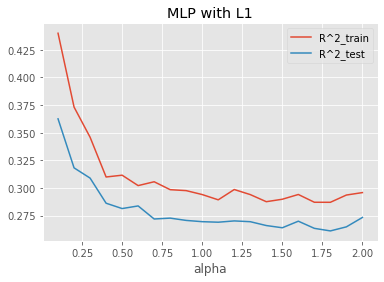

In [23]:
%matplotlib inline
# plot alpha vs. R^2
plt.title('MLP with L1')
plt.plot(l1_param_train[0], l1_param_train[1], label='R^2_train')
plt.plot(l1_param_train[0], l1_param_test[1],  label='R^2_test')
plt.xlabel("alpha")
plt.legend()
plt.show()

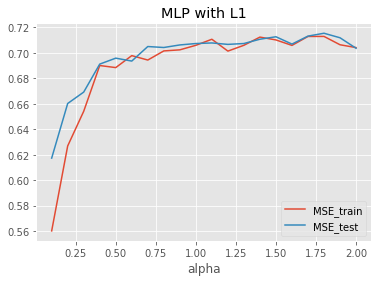

In [24]:
%matplotlib inline
# plot alpha vs. RMSE
plt.title('MLP with L1')
plt.plot(l1_param_train[0], l1_param_train[2], label='MSE_train')
plt.plot(l1_param_train[0], l1_param_test[2],  label='MSE_test')
plt.xlabel("alpha")
plt.legend()
plt.show()

In [25]:
# print the result of MLP_l1 on testing data in (0,2]
l1_param_test = np.array(l1_param_test)
# get the index of minimun mse, R^2 = (1-SSR)/SST, so R^2 is maximum when MSE is minimum
a_l1_test = np.argmin(l1_param_test, axis=1)
# print(a_l1_test)
print('The best result for MLP with L1 regularization: \nalpha = {} \nR^2 = {} \nMSE = {}'
      .format(l1_param_test[0][a_l1_test[2]], l1_param_test[1][a_l1_test[2]], l1_param_test[2][a_l1_test[2]]))

The best result for MLP with L1 regularization: 
alpha = 0.1 
R^2 = 0.36250160191781766 
MSE = 0.6173111926308202


### ====================== MLP with Ridge ======================

In [26]:
# train alpha_l2
# create an empty list to store training result
l2_param_train = [[], [], []]   # alpha_l2, score_l2_R2, score_l2_RME
l2_param_test = [[], [], []]   # alpha_l2, score_l2_R2, score_l2_RME

expected_l2_x = y_train
expected_l2_y = y_test

# grid search
# to find the optimal alpha value in the interval of (0,2]
# step length is 0.1
for alpha_train_l2 in range(1,21):
    # using Grid Search to search the best alpha in [0,2]
    # MLP model with L1 penalty
    # in ridge model, set alpha_l1 = 0.0
    mlp_l2 = MLPRegressor(alpha_l1 = 0.0, alpha_l2=alpha_train_l2*0.1)
    mlp_l2.fit(X_train, y_train)
    
    # training set
    predicted_l2_x = mlp_l2.predict(X_train)
    s_l2_train_r2 = metrics.r2_score(expected_l2_x, predicted_l2_x)
    s_l2_train_mse = metrics.mean_squared_error(expected_l2_x, predicted_l2_x)
    # append training results to the l2_param_train
    l2_param_train[0].append(alpha_train_l2*0.1)
    l2_param_train[1].append(s_l2_train_r2)
    l2_param_train[2].append(s_l2_train_mse)
    
    # testing set
    predicted_l2_y = mlp_l2.predict(X_test)
    s_l2_test_r2 = metrics.r2_score(expected_l2_y, predicted_l2_y)
    s_l2_test_mse = metrics.mean_squared_error(expected_l2_y, predicted_l2_y)
    # append testing results to the l2_param_train
    l2_param_test[0].append(alpha_train_l2*0.1)
    l2_param_test[1].append(s_l2_test_r2)
    l2_param_test[2].append(s_l2_test_mse)

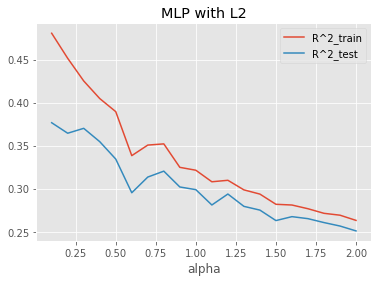

In [27]:
%matplotlib inline
# plot alpha vs. R^2
plt.title('MLP with L2')
plt.plot(l2_param_train[0], l2_param_train[1], label='R^2_train')
plt.plot(l2_param_train[0], l2_param_test[1],  label='R^2_test')
plt.xlabel("alpha")
plt.legend()
plt.show()

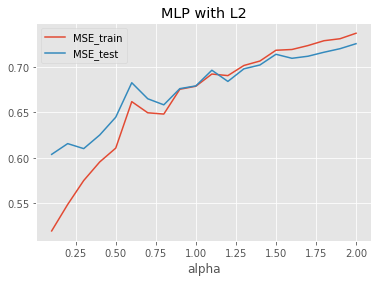

In [28]:
%matplotlib inline
# plot alpha vs. RMSE
plt.title('MLP with L2')
plt.plot(l2_param_train[0], l2_param_train[2], label='MSE_train')
plt.plot(l2_param_train[0], l2_param_test[2],  label='MSE_test')
plt.xlabel("alpha")
plt.legend()
plt.show()

In [29]:
# print the result of MLP_l2 on testing data in [0,2]
l2_param_test = np.array(l2_param_test)
# get the index of minimun mse
a_l2_test = np.argmin(l2_param_test, axis=1)
# print(a_l2_test)
print('The best result for MLP with L2 regularization: \nalpha = {} \nR^2 = {} \nMSE = {}'
      .format(l2_param_test[0][a_l2_test[2]], l2_param_test[1][a_l2_test[2]], l2_param_test[2][a_l2_test[2]]))

The best result for MLP with L2 regularization: 
alpha = 0.1 
R^2 = 0.37656001785207827 
MSE = 0.60369795449095


### ============== MLP with elastic net ================

In [40]:
# train alpha_l1_l2
# create an empty list to store training result
l1_l2_param_train = [[], [], [], []]   # alpha_l1_l2, score_l1_l2_R2, score_l1_l2_RME
l1_l2_param_test = [[], [], [], []]   # alpha_l1_l2, score_l1_l2_R2, score_l1_l2_RME

expected_l1_l2_x = y_train
expected_l1_l2_y = y_test

# grid search
# to find the optimal alpha value in the interval of (0,2]
# step length is 0.1

for alpha_l1 in range(1,21):
    for alpha_l2 in range(1,21):
        # using Grid Search to search the best alpha in [0,2]
        # MLP model with L1 & L2 penalty
        mlp_l1_l2 = MLPRegressor(alpha_l1=alpha_l1*0.1, alpha_l2=alpha_l2*0.1)
        mlp_l1_l2.fit(X_train, y_train)
        
        # training set
        predicted_l1_l2_x = mlp_l1_l2.predict(X_train)
        s_l1_l2_train_r2 = metrics.r2_score(expected_l1_l2_x, predicted_l1_l2_x)
        s_l1_l2_train_mse = metrics.mean_squared_error(expected_l1_l2_x, predicted_l1_l2_x)
        # append training results to the l1_l2_param_train
        l1_l2_param_train[0].append(alpha_l1*0.1)
        l1_l2_param_train[1].append(alpha_l2*0.1)
        l1_l2_param_train[2].append(s_l1_l2_train_r2)
        l1_l2_param_train[3].append(s_l1_l2_train_mse)

        # testing set
        predicted_l1_l2_y = mlp_l1_l2.predict(X_test)
        s_l1_l2_test_r2 = metrics.r2_score(expected_l1_l2_y, predicted_l1_l2_y)
        s_l1_l2_test_mse = metrics.mean_squared_error(expected_l1_l2_y, predicted_l1_l2_y)
        # append testing results to the l1_l2_param_test
        l1_l2_param_test[0].append(alpha_l1*0.1)
        l1_l2_param_test[1].append(alpha_l2*0.1)
        l1_l2_param_test[2].append(s_l1_l2_test_r2)
        l1_l2_param_test[3].append(s_l1_l2_test_mse)

In [41]:
# you can save the result to a local .csv file by the following code
# np.savetxt("MLP_L1&L2_energy.csv", l1_l2_param_test.T, delimiter =",",fmt ='% s')

In [42]:
# print the result of MLP_l1_l2 on testing data in [0,2]
l1_l2_param_test = np.array(l1_l2_param_test)
a_l1_l2_test = np.argmin(l1_l2_param_test, axis=1)
# print(a_l1_l2_test)
print('The best result for MLP with L1&L2 regularization: \nalpha_l1 = {} \nalpha_l2 = {} \nR^2 = {} \nMSE = {}'
      .format(l1_l2_param_test[0][a_l1_l2_test[3]], l1_l2_param_test[1][a_l1_l2_test[3]], 
              l1_l2_param_test[2][a_l1_l2_test[3]], l1_l2_param_test[3][a_l1_l2_test[3]]))

The best result for MLP with L1&L2 regularization: 
alpha_l1 = 1.4000000000000001 
alpha_l2 = 0.30000000000000004 
R^2 = 0.351545844529776 
MSE = 0.6279200218917748


Text(0.5, 0, 'alpha_l1')

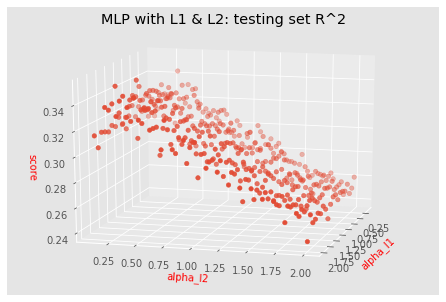

In [49]:
# plot the result of MLP with L1&L2 regularization
%matplotlib inline
fig = plt.figure()
ax = Axes3D(fig)
#  to make "-" show normally
plt.rcParams['axes.unicode_minus']=False

# plotting
surf = ax.scatter(l1_l2_param_test[0],l1_l2_param_test[1],l1_l2_param_test[2],cmap="Blues")
ax.view_init(elev=15, azim=15)

# setting tittle and labels
plt.title('MLP with L1 & L2: testing set R^2')
ax.set_zlabel('score', fontdict={'size': 10, 'color': 'red'})
ax.set_ylabel('alpha_l2', fontdict={'size': 10, 'color': 'red'})
ax.set_xlabel('alpha_l1', fontdict={'size': 10, 'color': 'red'})


Text(0.5, 0, 'alpha_l1')

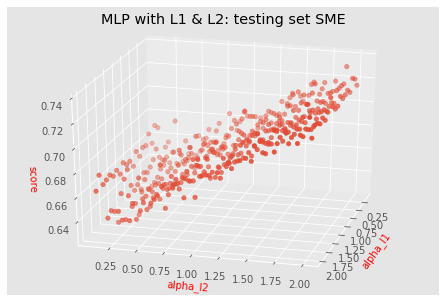

In [51]:
# plot the result of MLP with L1&L2 regularization
%matplotlib inline
fig = plt.figure()
ax = Axes3D(fig)

plt.rcParams['axes.unicode_minus']=False #  to make "-" show normally

# plotting
surf = ax.scatter(l1_l2_param_test[0],l1_l2_param_test[1],l1_l2_param_test[3],cmap="Blues")
ax.view_init(elev=25, azim=15)

# setting tittle and labels
plt.title('MLP with L1 & L2: testing set SME')
ax.set_zlabel('score', fontdict={'size': 10, 'color': 'red'})
ax.set_ylabel('alpha_l2', fontdict={'size': 10, 'color': 'red'})
ax.set_xlabel('alpha_l1', fontdict={'size': 10, 'color': 'red'})

### ============= Grid search for other parameters ===================

In [52]:
param_train = [[],[],[],[]]   # alpha_l1, alpha_l2, score_l1_l2_R2, score_l1_l2_RME
param_test = [[],[],[],[]]   # alpha_l1, alpha_l2, score_l1_l2_R2, score_l1_l2_RME

expected_x = y_train
expected_y = y_test

# here, we test two different hidden layer sizes and three diffrent solvers
# hidden_layer_sizes: (100,), (100, 30)
# solver: 'adam', 'sgd', 'lbfgs'
# the value of alpha_l1 and alpha_l2 are from the well-trained model before

for hidden_layer_sizes in [(100,), (100, 30)]:
    for solver in ['adam', 'sgd', 'lbfgs']:
        MLP = MLPRegressor(alpha_l1=1.4, alpha_l2=0.3, 
                                 hidden_layer_sizes=hidden_layer_sizes, solver=solver)
        MLP.fit(X_train, y_train)
        
        # training set
        predicted_x = MLP.predict(X_train)
        s_train_r2 = metrics.r2_score(expected_x, predicted_x)
        s_train_mse = metrics.mean_squared_error(expected_x, predicted_x)
        # append training result to the param_train list
        param_train[0].append(hidden_layer_sizes)
        param_train[1].append(solver)
        param_train[2].append(s_train_r2)
        param_train[3].append(s_train_mse)

        # testing set
        predicted_y = MLP.predict(X_test)
        s_test_r2 = metrics.r2_score(expected_y, predicted_y)
        s_test_mse = metrics.mean_squared_error(expected_y, predicted_y)
        # append testing result to the param_test list
        param_test[0].append(hidden_layer_sizes)
        param_test[1].append(solver)
        param_test[2].append(s_test_r2)
        param_test[3].append(s_test_mse)

In [53]:
# print the result of MLP
param_test = np.array(param_test)
# get the index of minimum mse
a_test = np.argmin(param_test, axis=1)
# print(a_test)
print('The best result for MLP:')
print('alpha_l1 = {} \nalpha_l2 = {}'.format(1.4, 0.3))
print('hidden_layer_sizes = {} \nsolver = {} \nR^2 = {} \nMSE = {}'
      .format(param_test[0][a_test[3]], param_test[1][a_test[3]], 
              param_test[2][a_test[3]], param_test[3][a_test[3]]))

The best result for MLP:
alpha_l1 = 1.4 
alpha_l2 = 0.3
hidden_layer_sizes = (100, 30) 
solver = adam 
R^2 = 0.4028439040617827 
MSE = 0.5782463812918692


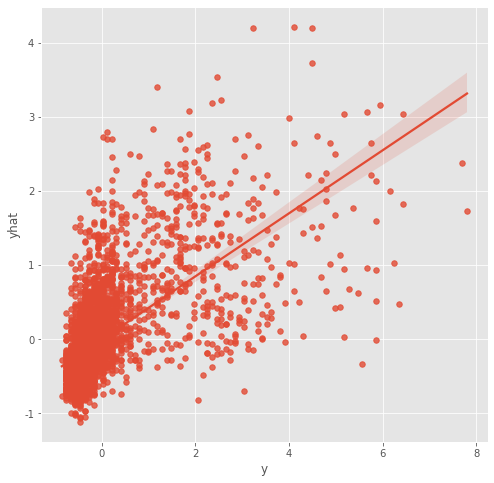

In [54]:
# utilizing the trained parameters
MLP_op = MLPRegressor(alpha_l1=1.4, alpha_l2=0.3, hidden_layer_sizes=(100,30), solver='adam')
MLP_op.fit(X_train, y_train)
expected_op_y = y_test
predicted_op_y = MLP_op.predict(X_test)

# plot the fitting diagram of y and yhat on testing dataset
plt.figure(figsize=(8, 8))
plt.xlabel("y")
plt.ylabel("yhat")
sns.regplot(expected_op_y, predicted_op_y, fit_reg=True, scatter_kws={"s": 30})

### k-fold validation
- Below show the k-fold (k=5 & k=10) cross validation for the MLP_op model.
- In the previous experiment, the whole data set was divided into training set and test set, so it was no longer necessary to use k-fold for validation. 
- The results below are only for the purpose of showing the results of model training.

In [41]:
# K-fold cross validation
print('k-fold cross validation:\n')
scores_5 = []
scores_5 = cross_val_score(MLP_op, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=1)
print('MSE Loss for k = 5:\n %s\n'% scores_5)

# neg_mean_squared_error return the negative mse, but mse should be a positive number
# fix the sign of MSE scores
mse_scores_5 = -scores_5

print ('Fixed MSE Loss for k = 5:\n %s\n'% mse_scores_5)
print('In conclusion: MSE Loss for k = 5: %3f +/- %3f'% (np.mean(mse_scores_5), np.std(mse_scores_5)))

k-fold cross validation:

MSE Loss for k = 5:
 [-0.67268344 -0.75052407 -0.51266011 -0.67433448 -0.66678722]

Fixed MSE Loss for k = 5:
 [0.67268344 0.75052407 0.51266011 0.67433448 0.66678722]

In conclusion: MSE Loss for k = 5: 0.655398 +/- 0.077731


In [55]:
# K-fold cross validation
print('k-fold cross validation:\n')
scores_10 = []
scores_10 = cross_val_score(MLP_op, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=1)
print('MSE Loss for k = 10:\n %s'% scores_10)

# neg_mean_squared_error return the negative mse, but mse should be a positive number
# fix the sign of MSE scores
mse_scores_10 = -scores_10

print ('\nFixed MSE Loss for k = 10:\n %s'% mse_scores_10)
print('\nIn conclusion: MSE Loss for k = 10: %3f +/- %3f'% (np.mean(mse_scores_10), np.std(mse_scores_10)))

k-fold cross validation:

MSE Loss for k = 10:
 [-0.70599384 -0.67262064 -0.73805399 -0.57447978 -0.58697355 -0.56849987
 -0.72707438 -0.63658375 -0.62574739 -0.66799767]

Fixed MSE Loss for k = 10:
 [0.70599384 0.67262064 0.73805399 0.57447978 0.58697355 0.56849987
 0.72707438 0.63658375 0.62574739 0.66799767]

In conclusion: MSE Loss for k = 10: 0.650402 +/- 0.058949
